In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np

In [3]:
from my_krml_24618288.data.sets import load_sets

X_train, y_train, X_val, y_val, X_test, y_test = load_sets()

In [4]:
df_train = pd.DataFrame(X_train, columns=['ds'])
df_train['y'] = y_train

In [5]:
df_val = pd.DataFrame(X_val, columns=['ds'])
df_val['y'] = y_val

In [6]:
import numpy as np
np.float_ = np.float64

In [7]:
from prophet import Prophet

C:\Users\JV\AppData\Local\pypoetry\Cache\virtualenvs\adv-mla-lab-2-wdnFAkb7-py3.11\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [8]:
prophet = Prophet()

In [9]:
prophet.fit(df_train)

14:48:06 - cmdstanpy - INFO - Chain [1] start processing
14:48:06 - cmdstanpy - INFO - Chain [1] done processing


In [10]:
from joblib import dump

dump(prophet,  '../models/prophet_default.joblib')

['../models/prophet_default.joblib']

In [11]:
forecast = prophet.predict(df_val)

C:\Users\JV\AppData\Local\pypoetry\Cache\virtualenvs\adv-mla-lab-2-wdnFAkb7-py3.11\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\JV\AppData\Local\pypoetry\Cache\virtualenvs\adv-mla-lab-2-wdnFAkb7-py3.11\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


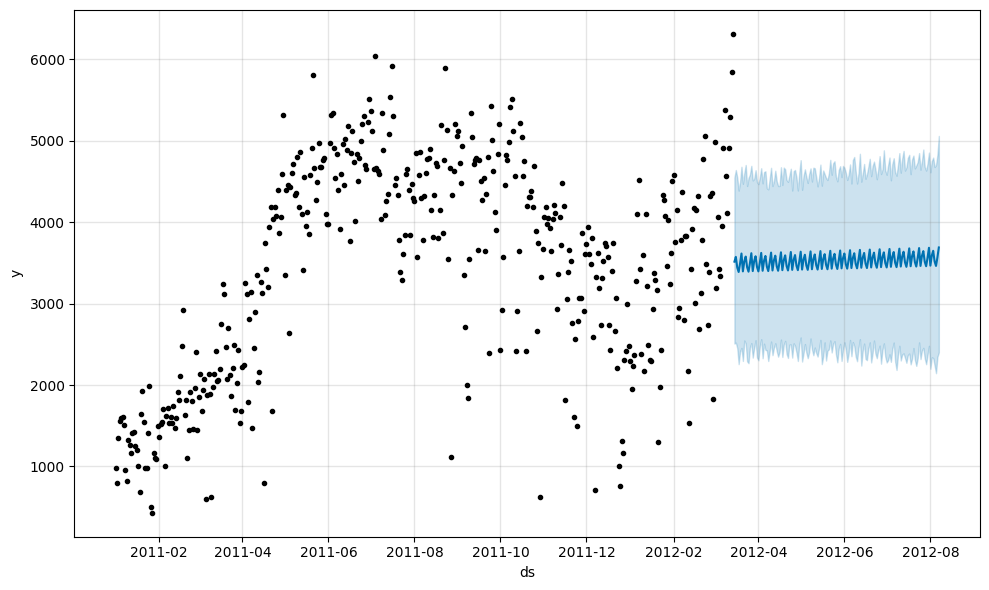

In [12]:
fig1 = prophet.plot(forecast)

C:\Users\JV\AppData\Local\pypoetry\Cache\virtualenvs\adv-mla-lab-2-wdnFAkb7-py3.11\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()


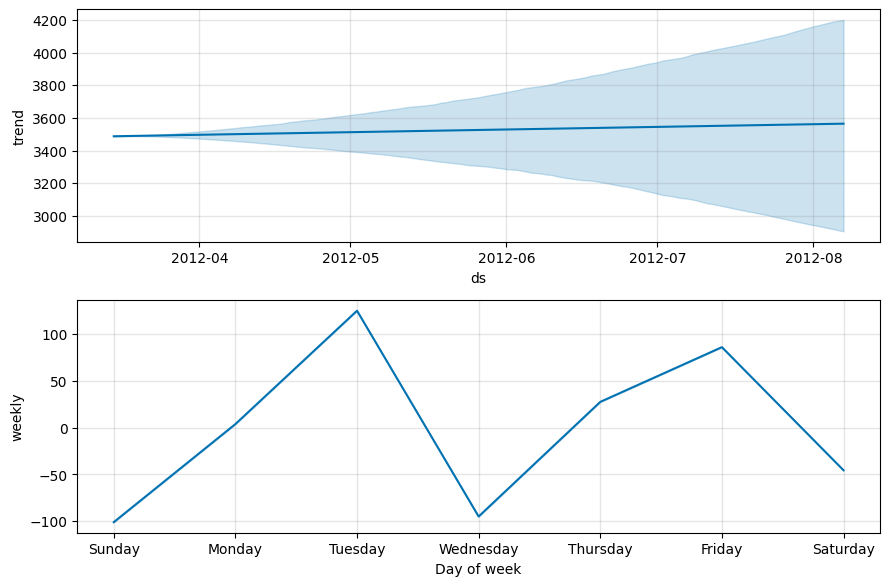

In [13]:
fig2 = prophet.plot_components(forecast)

In [15]:
from my_krml_24618288.models.performance import print_regressor_scores

In [16]:
print_regressor_scores(forecast['yhat'], df_val['y'], set_name='Validation')

RMSE Validation: 3020.8113463774826
MAE Validation: 2860.3577706811166


In [17]:
prophet_df = pd.read_csv('../data/interim/day_prophet.csv')

In [18]:
from prophet.diagnostics import cross_validation

In [19]:
cv_results = cross_validation(prophet, initial='365 days', period='7 days', horizon='7 days')

  0%|                                                                                           | 0/10 [00:00<?, ?it/s]14:49:34 - cmdstanpy - INFO - Chain [1] start processing
14:49:34 - cmdstanpy - INFO - Chain [1] done processing
 10%|████████▎                                                                          | 1/10 [00:00<00:02,  3.45it/s]14:49:34 - cmdstanpy - INFO - Chain [1] start processing
14:49:34 - cmdstanpy - INFO - Chain [1] done processing
 20%|████████████████▌                                                                  | 2/10 [00:00<00:03,  2.31it/s]14:49:35 - cmdstanpy - INFO - Chain [1] start processing
14:49:35 - cmdstanpy - INFO - Chain [1] done processing
 30%|████████████████████████▉                                                          | 3/10 [00:01<00:02,  2.66it/s]14:49:35 - cmdstanpy - INFO - Chain [1] start processing
14:49:35 - cmdstanpy - INFO - Chain [1] done processing
 40%|█████████████████████████████████▏                                 

In [20]:
from prophet.diagnostics import performance_metrics
metrics_results = performance_metrics(cv_results)
metrics_results

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,1 days,2.082079e+06,1442.940940,1262.404932,0.288100,0.299321,0.347628,0.4
1,2 days,8.411600e+05,917.147743,806.301842,0.205056,0.208661,0.234373,0.6
2,3 days,1.243324e+06,1115.044569,946.394670,0.322109,0.300676,0.310680,0.4
3,4 days,7.797762e+05,883.049353,715.714927,0.261649,0.183251,0.247968,0.8
4,5 days,1.015271e+06,1007.606391,806.347981,0.214754,0.182886,0.240486,0.7
5,6 days,2.065157e+06,1437.065314,1281.662430,0.290737,0.287197,0.349272,0.5
6,7 days,3.188127e+06,1785.532823,1525.033695,0.360498,0.426967,0.429725,0.4


In [21]:
from prophet.plot import plot_cross_validation_metric

C:\Users\JV\AppData\Local\pypoetry\Cache\virtualenvs\adv-mla-lab-2-wdnFAkb7-py3.11\Lib\site-packages\prophet\plot.py:546: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])
C:\Users\JV\AppData\Local\pypoetry\Cache\virtualenvs\adv-mla-lab-2-wdnFAkb7-py3.11\Lib\site-packages\prophet\plot.py:547: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])


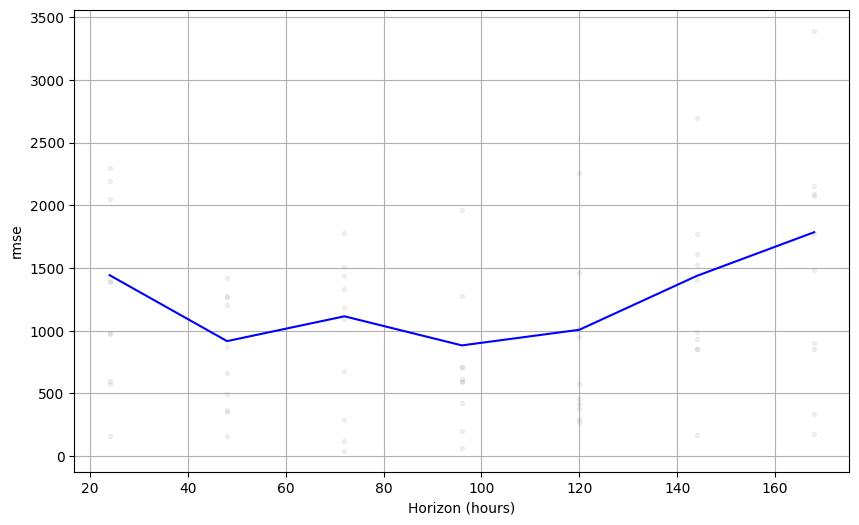

In [22]:
fig3 = plot_cross_validation_metric(cv_results, metric='rmse')

In [23]:
prophet1 = Prophet()

In [24]:
prophet1.add_country_holidays(country_name='US')

In [25]:
prophet1.fit(prophet_df)

14:50:28 - cmdstanpy - INFO - Chain [1] start processing
14:50:28 - cmdstanpy - INFO - Chain [1] done processing


In [26]:
dump(prophet1,  '../models/prophet_holiday.joblib')

['../models/prophet_holiday.joblib']

In [27]:
forecast1 = prophet1.predict(df_train)

C:\Users\JV\AppData\Local\pypoetry\Cache\virtualenvs\adv-mla-lab-2-wdnFAkb7-py3.11\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\JV\AppData\Local\pypoetry\Cache\virtualenvs\adv-mla-lab-2-wdnFAkb7-py3.11\Lib\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
C:\Users\JV\AppData\Local\pypoetry\Cache\virtualenvs\adv-mla-lab-2-wdnFAkb7-py3.11\Lib\site-packages\prophet\plot.py:354: FutureWarning: The behavior of DatetimeProper

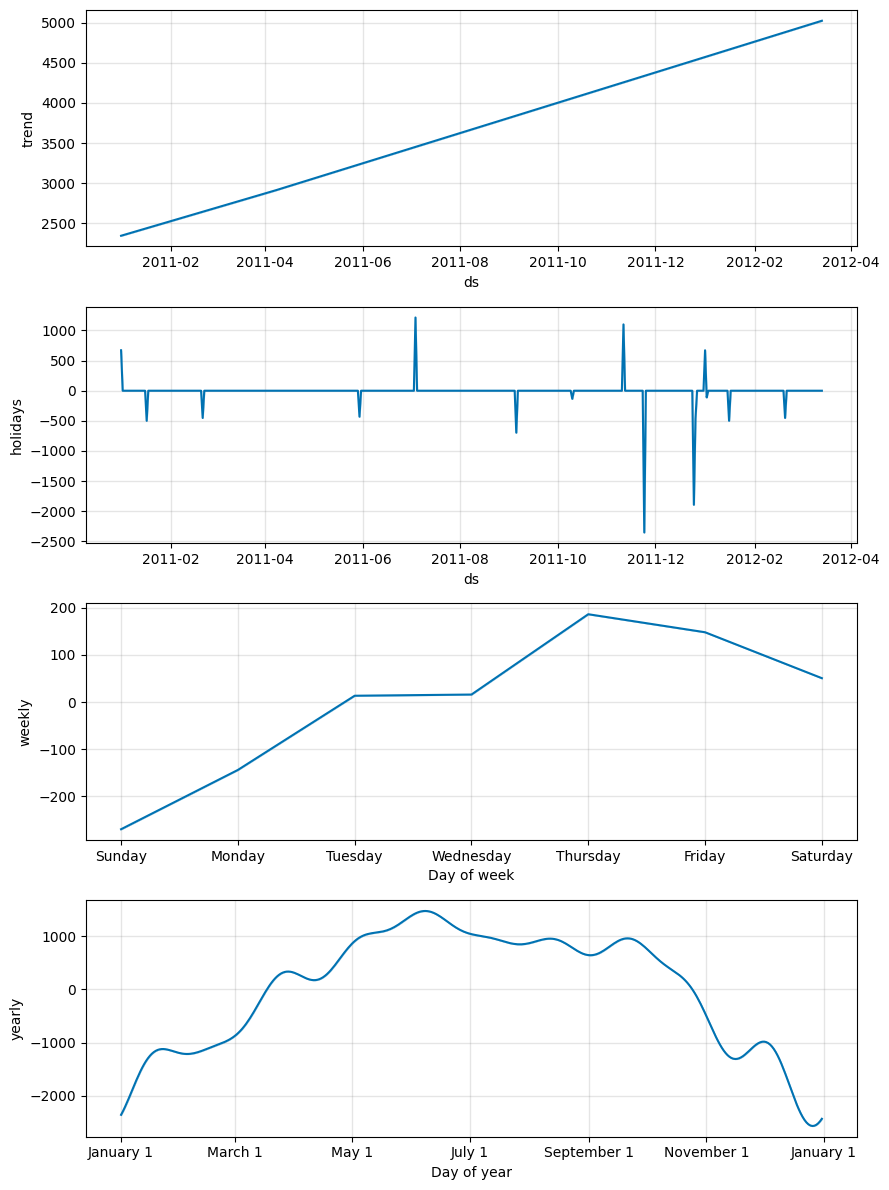

In [28]:
fig1 = prophet1.plot_components(forecast1)

In [29]:
cv_results1 = cross_validation(prophet1, initial='365 days', period='7 days', horizon='7 days')

Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.
  0%|                                                                                           | 0/52 [00:00<?, ?it/s]14:51:01 - cmdstanpy - INFO - Chain [1] start processing
14:51:01 - cmdstanpy - INFO - Chain [1] done processing
  2%|█▌                                                                                 | 1/52 [00:00<00:20,  2.47it/s]14:51:01 - cmdstanpy - INFO - Chain [1] start processing
14:51:01 - cmdstanpy - INFO - Chain [1] done processing
  4%|███▏                                                                               | 2/52 [00:00<00:19,  2.58it/s]14:51:02 - cmdstanpy - INFO - Chain [1] start processing
14:51:02 - cmdstanpy - INFO - Chain [1] done processing
  6%|████▊                                                                              | 3/52 [00:01<00:25,  1.91it/s]14:51:02 - cmdstanpy - INFO - Chain [1] start processing
14:51:02 - cmdstanpy - I

C:\Users\JV\AppData\Local\pypoetry\Cache\virtualenvs\adv-mla-lab-2-wdnFAkb7-py3.11\Lib\site-packages\prophet\plot.py:546: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])
C:\Users\JV\AppData\Local\pypoetry\Cache\virtualenvs\adv-mla-lab-2-wdnFAkb7-py3.11\Lib\site-packages\prophet\plot.py:547: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])


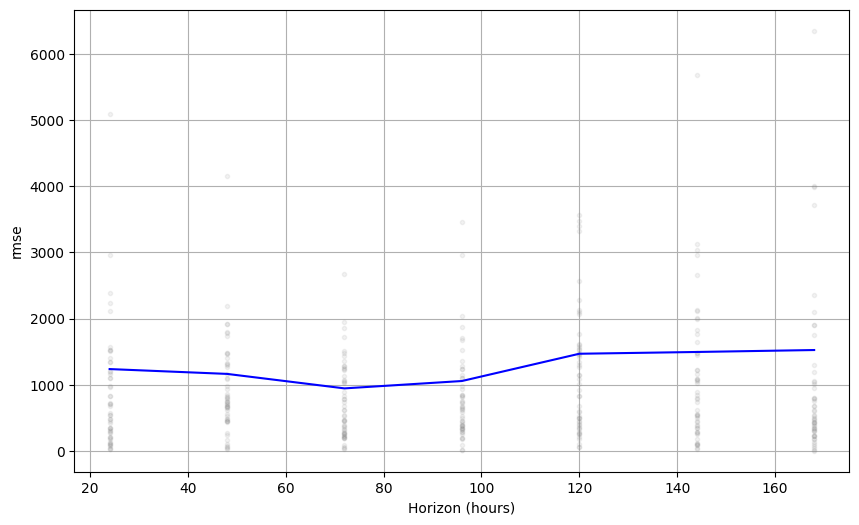

In [30]:
fig2 = plot_cross_validation_metric(cv_results1, metric='rmse')

In [31]:
prophet2 = Prophet()
prophet2.add_country_holidays(country_name='US')

In [32]:
prophet2.add_seasonality(name='monthly', period=30.5, fourier_order=5)

In [33]:
prophet2.fit(prophet_df)

14:51:40 - cmdstanpy - INFO - Chain [1] start processing
14:51:40 - cmdstanpy - INFO - Chain [1] done processing


In [34]:
dump(prophet2,  '../models/prophet_month.joblib')

['../models/prophet_month.joblib']

In [35]:
forecast2 = prophet2.predict(df_train)

C:\Users\JV\AppData\Local\pypoetry\Cache\virtualenvs\adv-mla-lab-2-wdnFAkb7-py3.11\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\JV\AppData\Local\pypoetry\Cache\virtualenvs\adv-mla-lab-2-wdnFAkb7-py3.11\Lib\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
C:\Users\JV\AppData\Local\pypoetry\Cache\virtualenvs\adv-mla-lab-2-wdnFAkb7-py3.11\Lib\site-packages\prophet\plot.py:354: FutureWarning: The behavior of DatetimeProper

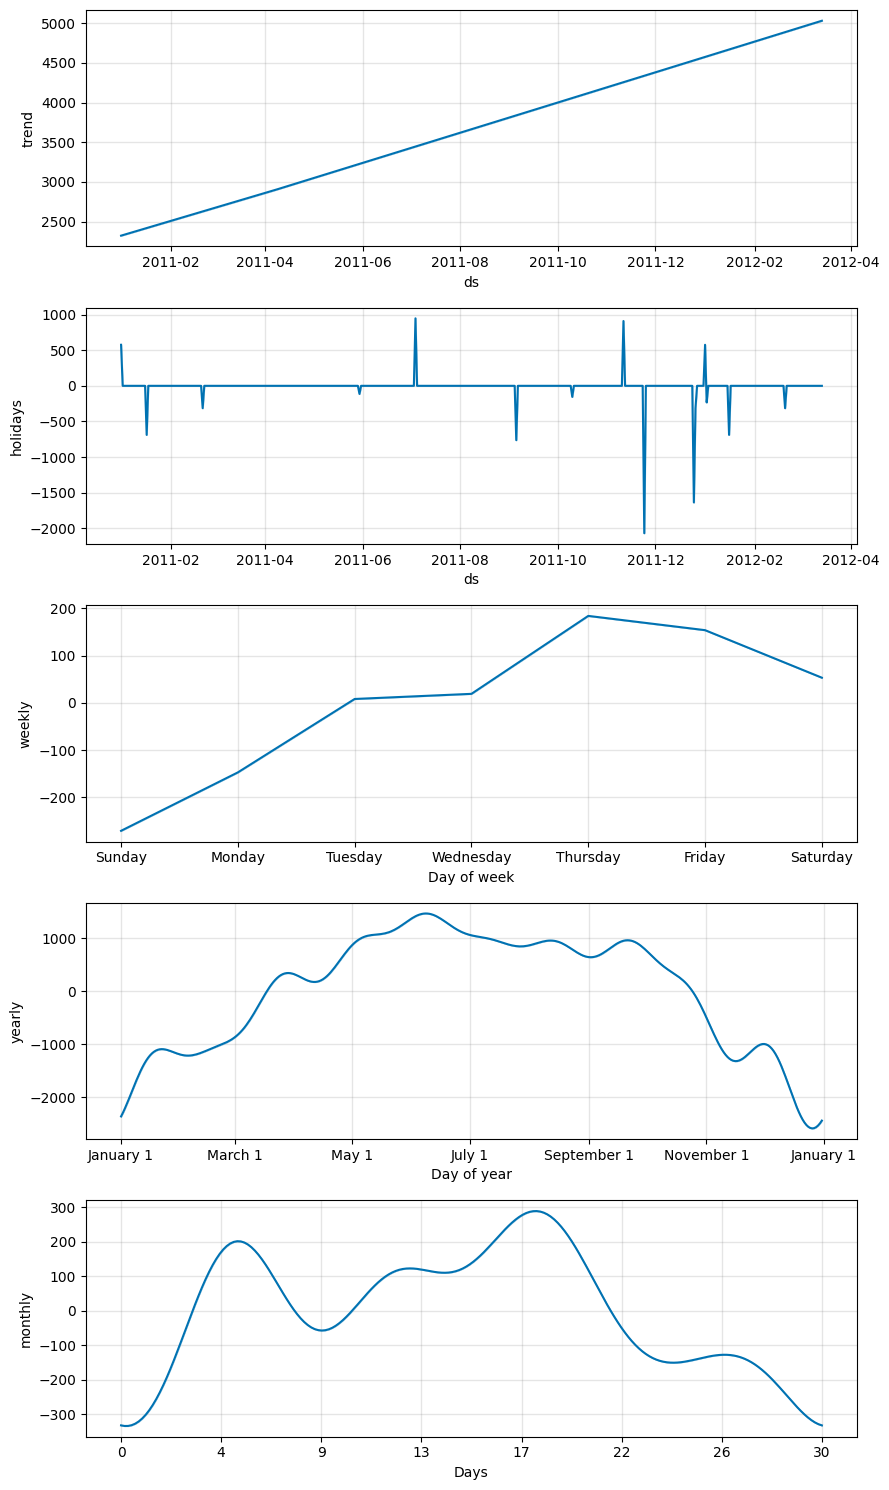

In [36]:
fig1 = prophet2.plot_components(forecast2)

In [37]:
cv_results2 = cross_validation(prophet2, initial='365 days', period='7 days', horizon='7 days')

Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.
  0%|                                                                                           | 0/52 [00:00<?, ?it/s]14:52:04 - cmdstanpy - INFO - Chain [1] start processing
14:52:04 - cmdstanpy - INFO - Chain [1] done processing
  2%|█▌                                                                                 | 1/52 [00:00<00:25,  1.99it/s]14:52:04 - cmdstanpy - INFO - Chain [1] start processing
14:52:05 - cmdstanpy - INFO - Chain [1] done processing
  4%|███▏                                                                               | 2/52 [00:01<00:24,  2.00it/s]14:52:05 - cmdstanpy - INFO - Chain [1] start processing
14:52:05 - cmdstanpy - INFO - Chain [1] done processing
  6%|████▊                                                                              | 3/52 [00:01<00:24,  2.01it/s]14:52:05 - cmdstanpy - INFO - Chain [1] start processing
14:52:05 - cmdstanpy - I

C:\Users\JV\AppData\Local\pypoetry\Cache\virtualenvs\adv-mla-lab-2-wdnFAkb7-py3.11\Lib\site-packages\prophet\plot.py:546: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])
C:\Users\JV\AppData\Local\pypoetry\Cache\virtualenvs\adv-mla-lab-2-wdnFAkb7-py3.11\Lib\site-packages\prophet\plot.py:547: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])


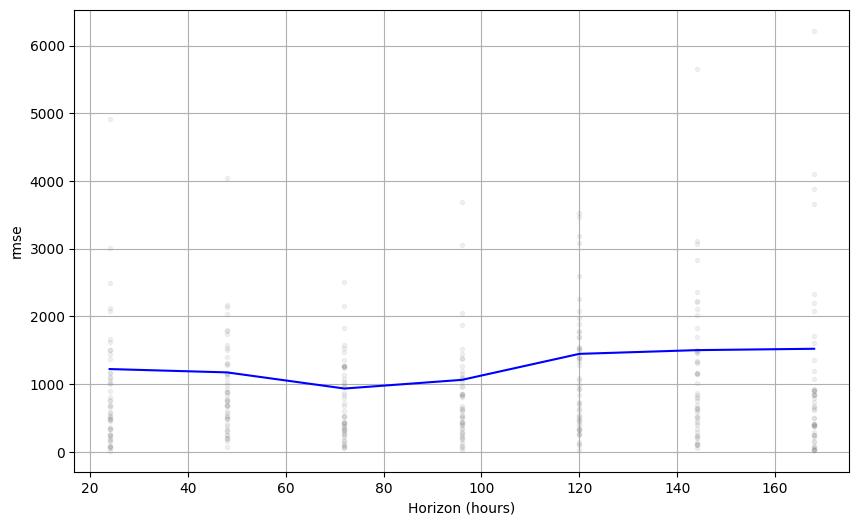

In [38]:
fig2 = plot_cross_validation_metric(cv_results2, metric='rmse')